<center><h1><strong>Regionalization of rainfall in the Amazon basin</strong></h1></center>

In [15]:
%%capture
import numpy as np 
import geopandas as gpd 
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd 
import cartopy.crs as ccrs
import cmocean as cmo
from rasterio import features
from affine import Affine
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import os

In [180]:
#---------------------
# DIR's and Files 
#---------------------
diri_shps = './Amazon_basin/'
fili_shps = [os.path.join(diri_shps,x) for x in os.listdir(diri_shps) if x.endswith('.shp')]
diri_ncs = './DATASET/'
fili_ncs = [os.path.join(diri_ncs,x) for x in os.listdir(diri_ncs) if x.endswith('.nc')]

In [160]:
#---------------------
# Reading SHP's Peru
#---------------------
shps_peru = gpd.read_file(fili_shps[0])
shps_SA = gpd.read_file(fili_shps[1])
shps_amazon = shps_SA[shps_SA['ID'] > 0]
#--------------------------
# Intersect Amazon vs Peru
#--------------------------
Amazonia_peru = gpd.overlay(shps_peru, shps_amazon, how='intersection')

In [181]:
fili_ncs

['./DATASET/new_PISCO2.nc']

In [182]:
#--------------------------
# Reading PISCO
#--------------------------
ds = xr.open_dataset(fili_ncs[0], decode_cf=False)
ds = xr.decode_cf(ds)

In [183]:
ds

<xarray.Dataset>
Dimensions:  (lat: 198, lon: 133, time: 432)
Coordinates:
  * lon      (lon) float64 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * lat      (lat) float64 -18.75 -18.65 -18.55 -18.45 ... 0.65 0.75 0.85 0.95
  * time     (time) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-01T12:00:00
Data variables:
    P        (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.2 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Thu Apr 12 13:49:43 2018: cdo mergetime /home/senamhi-cesar...
    crs:          +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0...
    crs_format:   PROJ.4
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-04-12 13:48:52
    CDO:          Climate Data Operators version 1.6.2 (http://code.zmaw.de/p...
    title:        Pisco_new
    author:       Carlos Enciso v.0.1

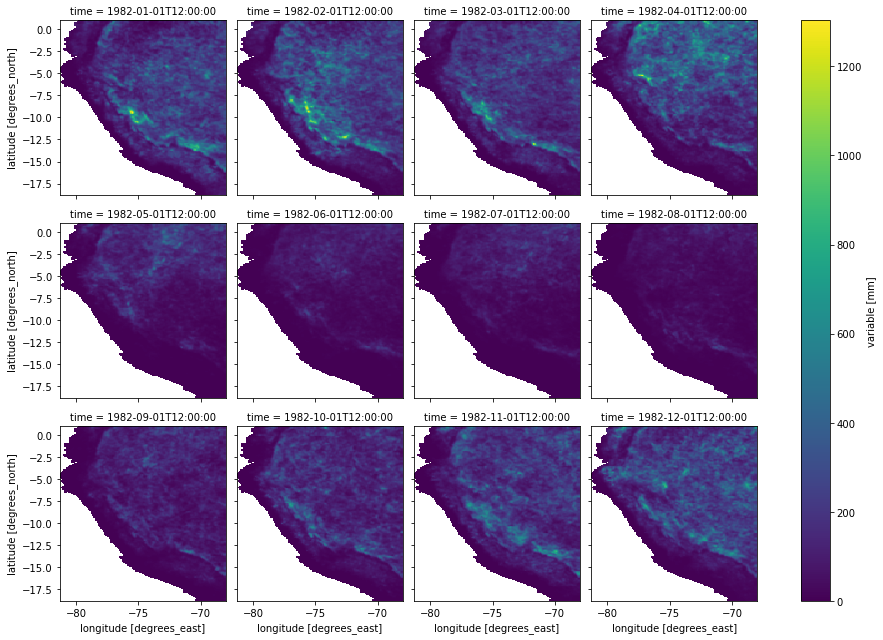

In [184]:
ds.P.isel(time=slice(12,24)).plot(col='time', col_wrap=4)

In [120]:
fili_ncs

['./Amazon_basin/PISCOpm2_1_fix.nc']

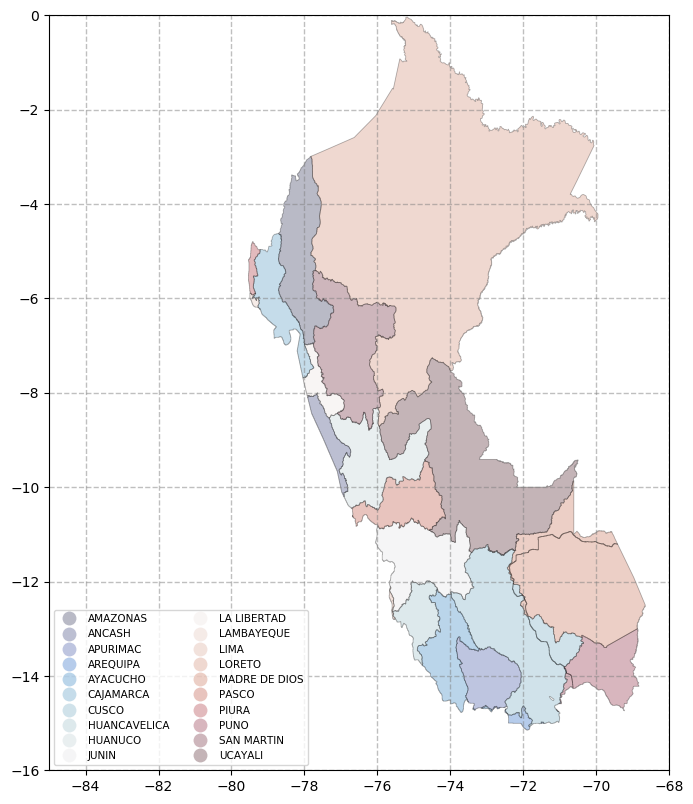

In [114]:
#------------------------------
# Plotting
#------------------------------
fig, ax = plt.subplots(figsize = (8,10), dpi=100)
Amazonia_peru.plot(alpha=0.3,
                   column='DEPARTAMEN',
                   edgecolor='k',
                   linewidth=0.6,
                   cmap=cmo.cm.balance,
                   figsize=(10,6),
                   categorical=True,
                   legend=True,
                   legend_kwds={'loc':'lower left', 'ncol':2, 'bbox_to_anchor': (.0, .0), 'fontsize':7.5},
                   ax=ax)
ax.set_ylim([-16,0])
ax.set_xlim([-85,-68])
ax.grid(linewidth=1, color='gray',alpha=0.5, linestyle='--')
ax.set_aspect('auto')